<a href="https://colab.research.google.com/github/Vikas-KM/machine-learning/blob/master/ML_Projects/Quora%20Pairing%20Problem/solving_quora_question_pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [ ]:
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zf = zipfile.ZipFile('/kaggle/input/quora-question-pairs/train.csv.zip')
df_train = pd.read_csv(zf.open('train.csv'))
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Examples of duplicate examples

In [ ]:
# change the index of iloc to see different questions to get and idea
df1 = df_train[df_train['is_duplicate'] == 0]
df2 = df_train[df_train['is_duplicate'] == 1]

qstn1 = df1.iloc[0]['question1']
qstn2 = df1.iloc[0]['question2']
is_dup1 = df1.iloc[0]['is_duplicate']

qstn3 = df2.iloc[0]['question1']
qstn4 = df2.iloc[0]['question2']
is_dup2 = df2.iloc[0]['is_duplicate']


print(qstn1)
print(qstn2)
print('are they duplicates? ', is_dup1)

print(qstn3)
print(qstn4)
print('are they duplicates? ', is_dup2)

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
are they duplicates?  0
Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
are they duplicates?  1


## basic analysis on the train data

In [ ]:
df_train.shape

(404290, 6)

In [ ]:
df_train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
df_train['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [ ]:
df_train.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
print('% of duplicate pairs of question {}%'.format(round(df_train['is_duplicate'].mean()*100,2)))

% of duplicate pairs of question 36.92%


## Exploratory Data Analysis

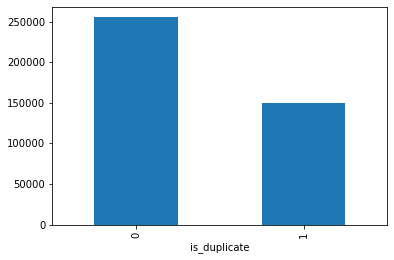

In [ ]:
# count of duplicate and not duplicate questions
df_train.groupby('is_duplicate')['id'].count().plot.bar()

### references
- https://datatofish.com/convert-pandas-dataframe-to-list/
- https://queirozf.com/entries/pandas-dataframe-examples-duplicated-data

In [ ]:
df_train['qid1'].value_counts()

8461      50
14110     48
25984     47
20628     47
1749      47
          ..
415339     1
411241     1
413288     1
409190     1
524288     1
Name: qid1, Length: 290654, dtype: int64

In [ ]:
df_train['qid2'].value_counts()

30782     120
2559      115
4044      100
2561       71
17978      66
         ... 
99475       1
105616      1
85130       1
525311      1
288755      1
Name: qid2, Length: 299364, dtype: int64

### Observations
- Some qids are repeated, that means few questions are repeating

In [ ]:
# number of unique questions
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
total_qstns = len(qids)
unique_qstns = len(np.unique(qids))
repeated_qstns = np.sum(qids.value_counts() >1)
print('Total number of questions ',total_qstns)
print('Total number of uniques questions ',unique_qstns)
print('Total number of repeated questions',repeated_qstns)

Total number of questions  808580
Total number of uniques questions  537933
Total number of repeated questions 111780


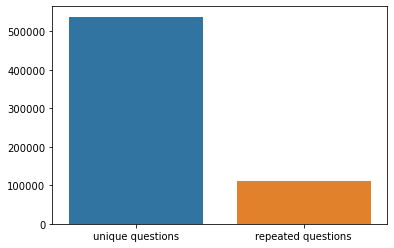

In [ ]:
x=['unique questions', 'repeated questions']
y=[unique_qstns, repeated_qstns]
sns.barplot(x, y)

In [ ]:
# how many times questions are repeated max?
qids.value_counts().iloc[:10]

2559     157
30782    120
4044     111
2561      88
14376     79
17978     77
2675      68
28764     66
1772      63
24555     61
dtype: int64

Text(0, 0.5, 'Number of questions')

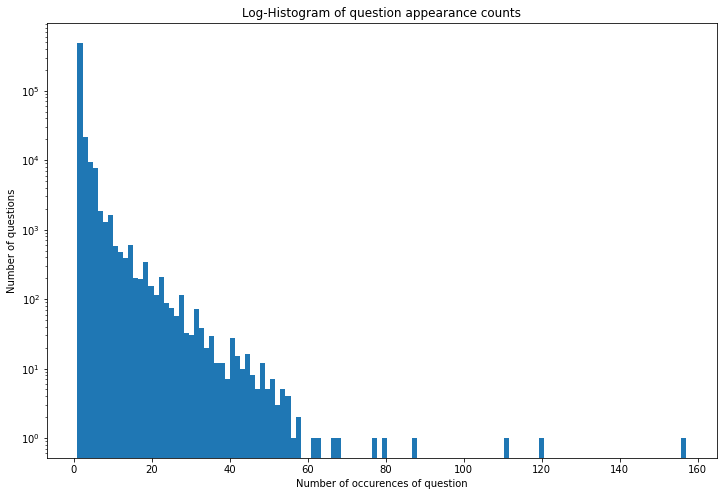

In [ ]:
from astropy.visualization import hist

plt.figure(figsize=(12, 8))
plt.hist(qids.value_counts(), bins=120)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

### Observations
- As from the above plot we can see, there is a question that is repeated 157, 120, 111 times
( see the above plot query for 157 number)

In [ ]:
df_train.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df_train[df_train.isna().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


### Observations
- There are 3 rows which have NaN value
    - we can delete those rows
    - we can fill them with a empty string
    
   
Since the NaN value are only 3 we will discard/drop them

### references
- https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [ ]:
df_train.dropna(axis=0, how='any', inplace=True)

In [ ]:
df_train[df_train.isna().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate


In [ ]:
df_train.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df_train.shape

(404287, 6)

### Naive Submission

In [ ]:
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean() # Our predicted probability
print('Predicted score:', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))

# zf = zipfile.ZipFile('/kaggle/input/quora-question-pairs/test.csv.zip')
# df_test = pd.read_csv(zf.open('test.csv'))

df_test = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv')
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()


Predicted score: 0.658528851473067


,test_id,is_duplicate
0,0,0.369201
1,1,0.369201
2,2,0.369201
3,3,0.369201
4,4,0.369201


In [ ]:
df = pd.read_csv('./naive_submission.csv')
df.dtypes

test_id           int64
is_duplicate    float64
dtype: object

In [ ]:
df.shape

(2345796, 2)

### Feature Engineering

### New Features Creation
- **freq_qid1, freq_qid2** -> Frequency count of the qids
- **qlen1, qlen2** -> Length of the question

- **q1_words, q2_words** -> Number of words in the question

In [ ]:
# copying the df_train to df
df = df_train.copy()
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### References
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html
- https://pbpython.com/pandas_transform.html

In [ ]:
# using pandas transform to count the frequency of the qstn based on qid
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1


In [ ]:
# finding the length of the qstn and creating a new feature
df['qlen1'] = df['question1'].apply(lambda x:len(x))
df['qlen2'] = df['question2'].apply(lambda x:len(x))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,qlen1,qlen2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39


In [ ]:
# number of words in the questions
df['q1_words'] = df['question1'].apply(lambda x: len(x.split(' ')))
df['q2_words'] = df['question2'].apply(lambda x: len(x.split(' ')))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,qlen1,qlen2,q1_words,q2_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7


### References
- https://stackoverflow.com/questions/11938964/how-to-find-common-words-and-print-them-using-python-command/12136296

    - common = set(document_1_words).intersection( set(document_2_words) )
    - unique = set(document_1_words).symmetric_difference( set(document_2_words) )
    
    
- **common_words** -> common words to question1 and question2
- **total_words** -> total unique words to belonging to both question1 and question2
- **share_words** -> the share words is defined as common words divided by total words

In [ ]:
# common words to both qstn1 and qstn2 
def word_common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return len(w1.intersection(w2))
df['common_words'] = df.apply(word_common, axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,qlen1,qlen2,q1_words,q2_words,common_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2


In [ ]:
# Total words of both qstn1 and qstn2 
def word_total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return len(w1)+len(w2)
df['total_words'] = df.apply(word_total, axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,qlen1,qlen2,q1_words,q2_words,common_words,total_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20


In [ ]:
# words shared between of both qstn1 and qstn2 

df['share_words'] = df['common_words']/(df['total_words'])

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,qlen1,qlen2,q1_words,q2_words,common_words,total_words,share_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000


### Analysis from the extracted features

In [ ]:
# minimum length of the question1
print('minimum length of the qstn1 is ',min(df['qlen1']))

# minimum length of the question2
print('minimum length of the qstn2 is ',min(df['qlen2']))

minimum length of the qstn1 is  1
minimum length of the qstn2 is  1


In [ ]:
# questions of minimum length
print(df[df['qlen1']== 1].shape[0])
df[df['qlen1']== 1]['question1']

19


3306      .
13016     ?
20794     ?
96725     ?
104101    ?
108978    i
115347    o
134403    ?
151922    o
158778    A
189659    ?
190570    ‘
199110    I
208485    ?
213220    ?
254161    ?
273065    ?
357127    H
402423    ?
Name: question1, dtype: object

In [ ]:
print(df[df['qlen2']== 1].shape[0])
df[df['qlen2']== 1]['question2']

2


47056     ?
198913    o
Name: question2, dtype: object

In [ ]:
df.shape[0]

404287

### Observation
- There are 19 questions of Question1 which has only 1 character
- There are 2 questions of Question2 which has only 1 character

These 21 form a miniscule part(0.005%) of the training, we can drop them

In [ ]:
min(df['q1_words'])

1

In [ ]:
print(df[df['q1_words']== 1].shape[0])
df[df['q1_words']== 1]['question1']
print(df[df['q1_words']== 1]['question1'].value_counts())

66


3306             .
13016            ?
17682      deleted
20794            ?
23305      deleted
            ...   
356434    Deleted.
357127           H
365317     deleted
381124          no
402423           ?
Name: question1, Length: 66, dtype: object

In [ ]:
min(df['q2_words'])

1

In [ ]:
print(df[df['q2_words']== 1].shape[0])
df[df['q2_words']== 1]['question2']
print(df[df['q2_words']== 1]['question2'].value_counts())

22
What?            3
…………..           2
Deleted.         2
Spam             2
Hh               1
?                1
[removed]        1
deleted          1
Does?            1
HH               1
lol              1
Delete           1
Edit             1
o                1
Why              1
parisflatlist    1
????             1
Name: question2, dtype: int64


### Observations
- There are 66 and 22 question with one word in question1 and Question2
- bunch of keywords are deleted/delete spam and lol and dots conveying nothing at all

### References:
- https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/notebook